In [1]:
from gradio_client import Client
import shutil
from IPython.display import Image

client = Client("https://sana.hanlab.ai/")
def gen(id, prompt, seed, extra=', photographed in a dark room, watercolor masterpiece, Studio Ghibli style, simple shapes, flat shading'):
    prompt += extra
    result = client.predict(
            prompt=prompt,
            negative_prompt="",
            style="Fantasy art",
            use_negative_prompt=False,
            num_imgs=1,
            seed=seed,
            height=256,
            width=256,
            flow_dpms_guidance_scale=4.5,
            flow_dpms_pag_guidance_scale=1,
            flow_dpms_inference_steps=20,
            randomize_seed=False,
            api_name="/run"
    )
    path = result[0][0]['image']
    shutil.copy(path, f"public/images/generated/{id}.png")
    return Image(path)

Loaded as API: https://sana.hanlab.ai/ ✔


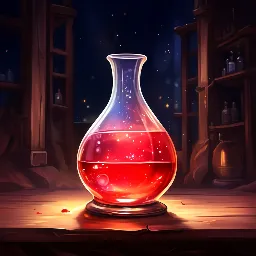

In [75]:
gen('Health Potion', 'A flask filled with a red liquid', 1)

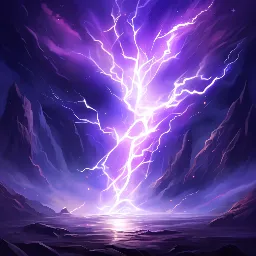

In [76]:
gen('Purple Spark', 'A purple lightning bolt', 1)

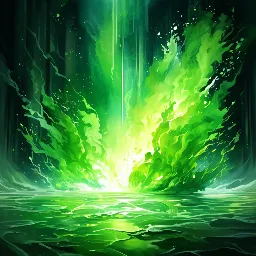

In [77]:
gen('Acid Bolt', 'a violent splash of green acid', 1)

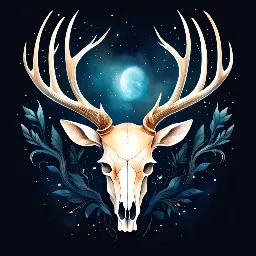

In [78]:
gen('Blessing of the Woods', 'a deer skull', 1)

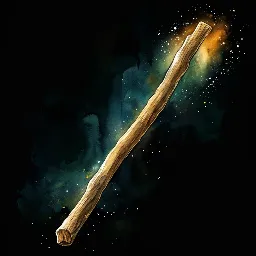

In [79]:
gen('Wooden Stick', 'a simple wooden stick', 1)

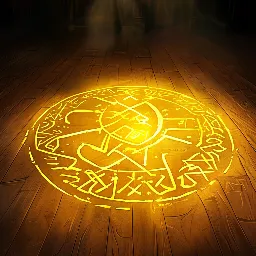

In [154]:
gen('Enscribe', 'nordic runes painted in yellow on the floor, close up', 8)

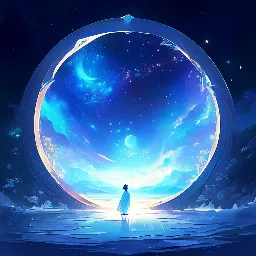

In [113]:
gen('Lunar Portal', 'a circular portal to a nightscape', 5)

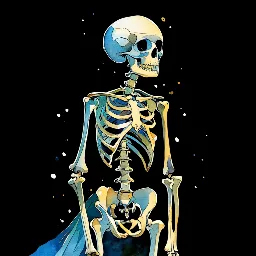

In [ ]:
gen('Animated Skeleton', 'a weak unarmored skeleton standing up, black background', 7)

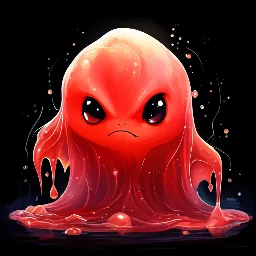

In [11]:
gen('Wild Slime', 'a translucent red slime creature with angry eyes, black background', 3)